Using Theano backend.


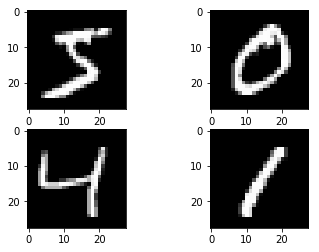

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# base line model with MLP

In [2]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [9]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
4s - loss: 0.2805 - acc: 0.9203 - val_loss: 0.1416 - val_acc: 0.9586
Epoch 2/10
3s - loss: 0.1124 - acc: 0.9668 - val_loss: 0.0940 - val_acc: 0.9722
Epoch 3/10
3s - loss: 0.0727 - acc: 0.9794 - val_loss: 0.0815 - val_acc: 0.9752
Epoch 4/10
3s - loss: 0.0512 - acc: 0.9850 - val_loss: 0.0739 - val_acc: 0.9780
Epoch 5/10
3s - loss: 0.0376 - acc: 0.9896 - val_loss: 0.0664 - val_acc: 0.9789
Epoch 6/10
3s - loss: 0.0273 - acc: 0.9929 - val_loss: 0.0655 - val_acc: 0.9788
Epoch 7/10
3s - loss: 0.0210 - acc: 0.9947 - val_loss: 0.0638 - val_acc: 0.9807
Epoch 8/10
3s - loss: 0.0137 - acc: 0.9971 - val_loss: 0.0625 - val_acc: 0.9817
Epoch 9/10
3s - loss: 0.0108 - acc: 0.9978 - val_loss: 0.0597 - val_acc: 0.9809
Epoch 10/10
3s - loss: 0.0082 - acc: 0.9985 - val_loss: 0.0602 - val_acc: 0.9811
Baseline Error: 1.89%


# Simple Convolutional Neural Network

In [11]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [12]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [13]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [14]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [15]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [16]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
48s - loss: 0.2351 - acc: 0.9336 - val_loss: 0.0794 - val_acc: 0.9764
Epoch 2/10
46s - loss: 0.0705 - acc: 0.9790 - val_loss: 0.0440 - val_acc: 0.9854
Epoch 3/10
48s - loss: 0.0495 - acc: 0.9848 - val_loss: 0.0394 - val_acc: 0.9876
Epoch 4/10
43s - loss: 0.0403 - acc: 0.9872 - val_loss: 0.0390 - val_acc: 0.9874
Epoch 5/10
40s - loss: 0.0329 - acc: 0.9899 - val_loss: 0.0352 - val_acc: 0.9881
Epoch 6/10
40s - loss: 0.0263 - acc: 0.9914 - val_loss: 0.0324 - val_acc: 0.9899
Epoch 7/10
49s - loss: 0.0221 - acc: 0.9928 - val_loss: 0.0351 - val_acc: 0.9879
Epoch 8/10
49s - loss: 0.0188 - acc: 0.9939 - val_loss: 0.0281 - val_acc: 0.9898
Epoch 9/10
48s - loss: 0.0160 - acc: 0.9950 - val_loss: 0.0339 - val_acc: 0.9890
Epoch 10/10
43s - loss: 0.0144 - acc: 0.9954 - val_loss: 0.0310 - val_acc: 0.9901
Baseline Error: 0.99%


# Test On CIFAR 10

In [52]:
from keras.datasets import cifar10
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 3, 32, 32)
Train labels shape:  (50000, 1)
Test data shape:  (10000, 3, 32, 32)
Test labels shape:  (10000, 1)


In [56]:
X_train.shape[1]

3

# MLP

In [57]:
# flatten 32*32*3 images to a 2892 vector for each image
num_pixels = X_train.shape[2] * X_train.shape[3]*X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [58]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [59]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [60]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [62]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
28s - loss: 11.6921 - acc: 0.1675 - val_loss: 11.5759 - val_acc: 0.1917
Epoch 2/15
32s - loss: 11.7136 - acc: 0.1853 - val_loss: 11.7184 - val_acc: 0.1808
Epoch 3/15
70s - loss: 11.7103 - acc: 0.1928 - val_loss: 11.9635 - val_acc: 0.1695
Epoch 4/15
156s - loss: 11.6800 - acc: 0.1985 - val_loss: 11.6271 - val_acc: 0.2032
Epoch 5/15
127s - loss: 11.5401 - acc: 0.2146 - val_loss: 11.7140 - val_acc: 0.1756
Epoch 6/15
131s - loss: 11.4436 - acc: 0.2088 - val_loss: 10.5701 - val_acc: 0.1784
Epoch 7/15
138s - loss: 10.2072 - acc: 0.2192 - val_loss: 10.1615 - val_acc: 0.2213
Epoch 8/15
144s - loss: 9.6045 - acc: 0.2415 - val_loss: 7.3091 - val_acc: 0.2764
Epoch 9/15
141s - loss: 2.4496 - acc: 0.3617 - val_loss: 1.6479 - val_acc: 0.4170
Epoch 10/15
142s - loss: 1.5890 - acc: 0.4339 - val_loss: 1.5614 - val_acc: 0.4324
Epoch 11/15
144s - loss: 1.5468 - acc: 0.4483 - val_loss: 1.5618 - val_acc: 0.4412
Epoch 12/15
153s - loss: 1.4966 - a

# Covolutional NN

In [36]:
# If using tensorflow, set image dimensions order
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")


In [37]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [38]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  train_features.shape
num_classes = len(np.unique(train_labels))

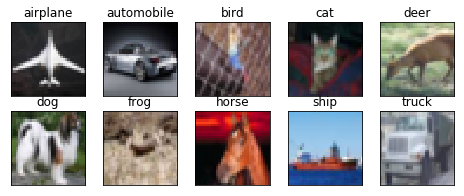

In [39]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [40]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [41]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [42]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

/home/raheleh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same", input_shape=(3, 32, 32...)`
  app.launch_new_instance()
/home/raheleh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
/home/raheleh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/home/raheleh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/home/raheleh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/home/raheleh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: UserWarning: Update your `Conv2

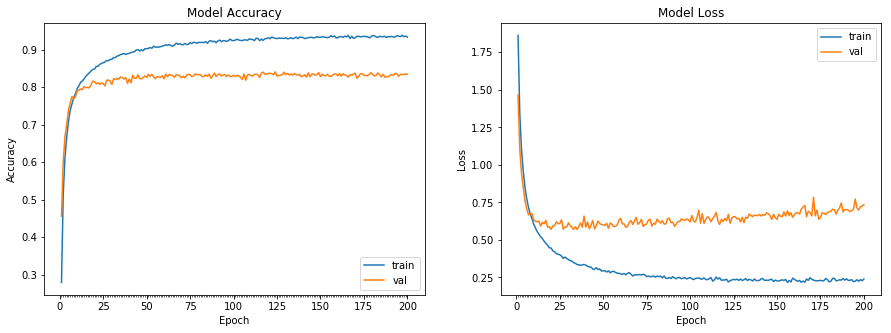

Model took 85698.18 seconds to train
Accuracy on test data is: 83.41


In [43]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(3, 32, 32)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128, nb_epoch=200, 
                       validation_data = (test_features, test_labels), 
                       verbose=0)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)
